In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn")

In [16]:
df = yf.download("TSLA", start="2017-01-01", end="2020-04-30")

[*********************100%***********************]  1 of 1 completed


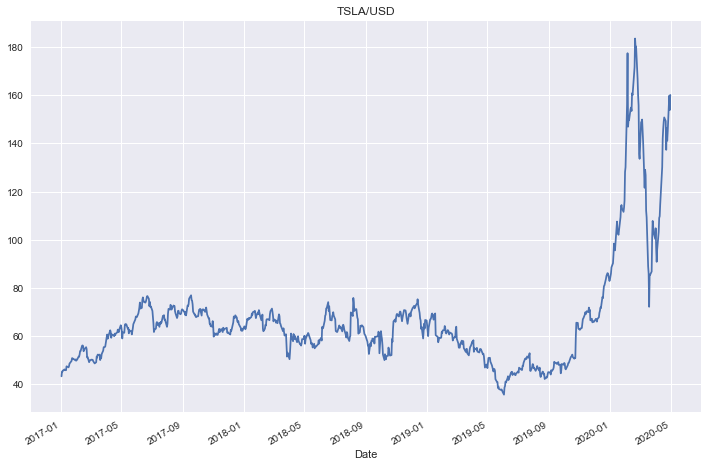

In [23]:
df['Close'].plot(figsize=(12,8), title='TSLA/USD', fontsize=10)

In [38]:
# Log returns
df['returns'] = np.log(df['Close'].div(df['Close'].shift(1)))

In [ ]:
##########
# Strategy
##########

In [40]:
# Drop all NA's
df.dropna(inplace=True)

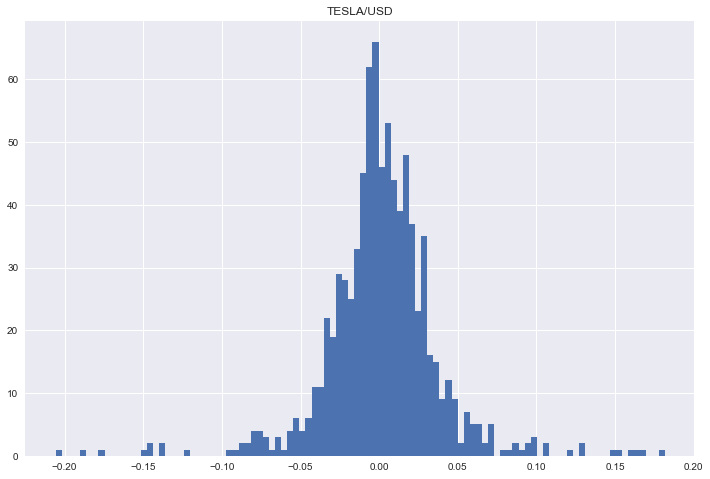

In [44]:
# Histogram
df['returns'].hist(bins=100, figsize=(12,8))
plt.title("TESLA/USD")
plt.show()

In [45]:
# Cumulative returns
df['returns'].sum()

1.3053978137073055

In [46]:
# Investing $1 in Tesla at start till end date return $3.7
np.exp(df['returns'].sum())

3.6891563988124645

In [47]:
# Confirming 
df['Close'][-1] / df['Close'][0]

3.526631331825817

In [49]:
df['returns'].cumsum().apply(np.exp)

Date
2017-01-04    1.046085
2017-01-05    1.044979
2017-01-06    1.055394
2017-01-09    1.065856
2017-01-10    1.059358
                ...   
2020-04-23    3.251901
2020-04-24    3.341859
2020-04-27    3.681045
2020-04-28    3.544495
2020-04-29    3.689156
Name: returns, Length: 835, dtype: float64

In [50]:
df['creturns'] = df['returns'].cumsum().apply(np.exp)

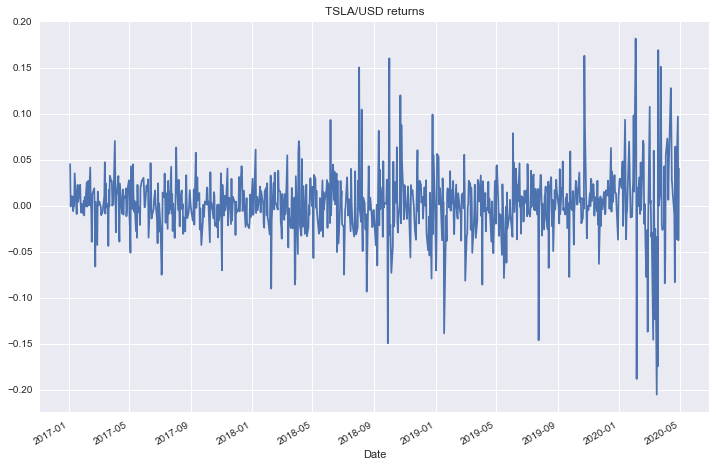

In [76]:
# Plotting returns
df['returns'].plot(figsize=(12,8), title='TSLA/USD returns', fontsize=10)

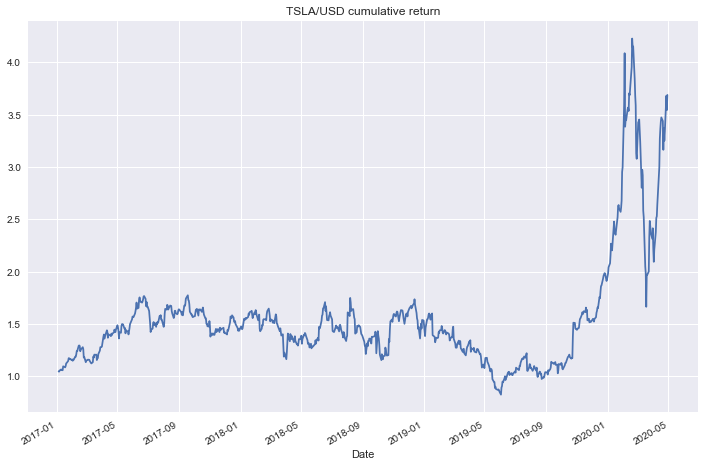

In [75]:
# plotting cum returns
df['creturns'].plot(figsize=(12,8), title='TSLA/USD cumulative return', fontsize=10)

# Performance metrics

In [57]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,returns,creturns
count,835.000000,835.000000,835.000000,835.000000,835.000000,8.350000e+02,835.000000,835.000000
mean,66.753598,68.129140,65.388340,66.816299,66.816299,4.615294e+07,0.001563,1.539617
std,23.153866,24.198153,22.163968,23.186044,23.186044,3.099460e+07,0.036668,0.534265
min,36.220001,37.335999,35.397999,35.793999,35.793999,1.093350e+07,-0.205522,0.824785
25%,54.047998,55.037001,53.226000,54.454000,54.454000,2.662600e+07,-0.014103,1.254758
50%,62.757999,63.646000,61.742001,62.813999,62.813999,3.608350e+07,0.001164,1.447394
75%,69.448002,70.424999,68.438000,69.467999,69.467999,5.357975e+07,0.018313,1.600719
max,184.699997,193.798004,180.203995,183.483994,183.483994,3.046940e+08,0.181445,4.227937


In [58]:
# Annualised mean returns and Risks
df['returns'].mean() * 252 

0.39396437012483937

In [60]:
df['returns'].std() * np.sqrt(252) # Risk

0.5820890920904501

In [61]:
# Maximum Drawdown

In [62]:
df['cummax'] = df.creturns.cummax()

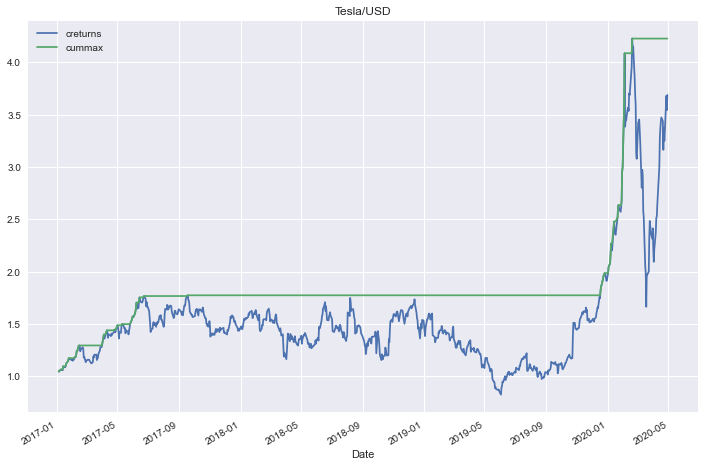

In [65]:
df[['creturns', 'cummax']].dropna().plot(figsize=(12,8), title="Tesla/USD")
plt.show()

In [72]:
drawdown = df['cummax'] - df['creturns']

In [73]:
drawdown.max() # Max Drawdown

2.5632516080261754

In [77]:
drawdown.idxmax()

Timestamp('2020-03-18 00:00:00')